<h1> NAICS 2017 – Statistics Canada:</h1><br>
<p> Description of the North American Industry<br>
Classification System (NAICS). All you would need to understand for this task is, <br>
how the NAICS works as a hierarchical structure for defining industries at different levels of<br>
aggregation. For example  3-digit NAICS industries (236 - Construction of buildings, 237 - Heavy<br>
and civil engineering construction, and a few more 3-digit NAICS industries).<br></p>


<IMG SRC='NAISC.PNG'>

<H1>Summary of the data set files we will be using:-</h1><br>
<ol>
<li> <p>15 RTRA (Real-Time Remote Access) CSV files containing employment data by industry at different levels of aggregation, 2-digit NAICS, 3-digit NAICS, and 4-digit NAICS. We will search through rows with 2, or 3, or 4 digits NAICS and append employment data each month of each year from 1997 - 2018 
	Meaning of columns in the files:</p></li>
    <ul>
		<li>SYEAR: Survey Year</li>
		<li> SMTH: Survey Month</li>
		<li> NAICS: Industry name and associated NAICS code in the bracket</li>
		<li> _EMPLOYMENT_: Employment</li>
</ul>

<li> <p>LMO Detailed Industries by NAICS: An excel file for mapping the RTRA data to the desired data row.
 Columns in the file:</p>
 <ul>
		<li>- Column 1 lists all 59 industries that are used frequently </li>
		<li>- Column 2 list the industries NAICS definitions</li>
</ul>
</ol>
<p>As part of our data wrangling, we would create a dataset of monthly employment series from 1997 to 2018 for the industries.<br>

One of the guiding principles for our data wrangling is to try to create each series from the highest possible level of aggregation in the raw data files,<br> thus, if an LMO Detailed Industry is defined with a 2-digit NAICS only, we would not use a lower level of aggregation (i.e. 3-digit or 4-digit level NAICS files in the RTRA),<br> 
similarly, if an LMO Detailed Industry is defined with a 3-digit NAICS only, we would not use the 4-digit NAICS files for that industry. <br></p>


In [ ]:
# Importing the needed libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Uploading files

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Data_Output_Template.xlsx to Data_Output_Template (1).xlsx
Saving LMO_Detailed_Industries_by_NAICS.xlsx to LMO_Detailed_Industries_by_NAICS (1).xlsx
Saving RTRA_Employ_2NAICS_00_05.csv to RTRA_Employ_2NAICS_00_05 (1).csv
Saving RTRA_Employ_2NAICS_06_10.csv to RTRA_Employ_2NAICS_06_10 (1).csv
Saving RTRA_Employ_2NAICS_11_15.csv to RTRA_Employ_2NAICS_11_15 (1).csv
Saving RTRA_Employ_2NAICS_16_20.csv to RTRA_Employ_2NAICS_16_20 (1).csv
Saving RTRA_Employ_2NAICS_97_99.csv to RTRA_Employ_2NAICS_97_99 (1).csv
Saving RTRA_Employ_3NAICS_00_05.csv to RTRA_Employ_3NAICS_00_05 (1).csv
Saving RTRA_Employ_3NAICS_06_10.csv to RTRA_Employ_3NAICS_06_10 (1).csv
Saving RTRA_Employ_3NAICS_11_15.csv to RTRA_Employ_3NAICS_11_15 (1).csv
Saving RTRA_Employ_3NAICS_16_20.csv to RTRA_Employ_3NAICS_16_20 (1).csv
Saving RTRA_Employ_3NAICS_97_99.csv to RTRA_Employ_3NAICS_97_99 (1).csv
Saving RTRA_Employ_4NAICS_00_05.csv to RTRA_Employ_4NAICS_00_05 (1).csv
Saving RTRA_Employ_4NAICS_06_10.csv to RTRA_Employ_4

In [ ]:
# Reading  LMO_Detailed_Industries_by_NAICS  & data_output

lmo_detailes = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
data_output=pd.read_excel('Data_Output_Template.xlsx')

In [ ]:
# Clean LMO_Detailed_Industries_by_NAICS

CleanedNAISC=lmo_detailes['NAICS'].astype(str).str.replace(' &', ',').str.split(', ')
lmo_detailes['NAICS']=CleanedNAISC
lmo_detailes.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"[111, 112]"
1,"Fishing, hunting and trapping",[114]
2,Forestry and logging,[113]
3,Support activities for agriculture and forestry,[115]
4,Oil and gas extraction,[211]


In [ ]:
lmo_detailes.isnull().sum()
# no Null Values 

LMO_Detailed_Industry    0
NAICS                    0
dtype: int64

In [ ]:
# Clean data_output
data_output.isnull().sum()
# FillNan Values
data_output=data_output.fillna(0)
data_output.isnull().sum()


SYEAR                    0
SMTH                     0
LMO_Detailed_Industry    0
Employment               0
dtype: int64

In [ ]:
# check and delete duplicates using group by
lmo = lmo_detailes.T.groupby(level=0).first().T

In [ ]:
lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"[111, 112]"
1,"Fishing, hunting and trapping",[114]
2,Forestry and logging,[113]
3,Support activities for agriculture and forestry,[115]
4,Oil and gas extraction,[211]


In [ ]:
lmo.info()

data_output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   LMO_Detailed_Industry  59 non-null     object
 1   NAICS                  59 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SYEAR                  15576 non-null  int64  
 1   SMTH                   15576 non-null  int64  
 2   LMO_Detailed_Industry  15576 non-null  object 
 3   Employment             15576 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 486.9+ KB


In [ ]:
#clean the RTRA files NAICS column then Create NAIC drop the old one 
def Cleaning(df):
    df['NAICS'] = df.NAICS\
                        .map(lambda x:x.split('[')[1].strip(']').replace('-', ','))
    df = df.drop(columns = 'NAICS', axis = 1)[df.SYEAR < 2019]
    return df

In [ ]:
# loading 2 digit code dataset

df2_naics = pd.read_csv('RTRA_Employ_2NAICS_00_05.csv')

employ_2_naics_files = ['RTRA_Employ_2NAICS_06_10.csv',  'RTRA_Employ_2NAICS_11_15.csv', 'RTRA_Employ_2NAICS_16_20.csv',  'RTRA_Employ_2NAICS_97_99.csv']


for i in employ_2_naics_files:
    df = pd.read_csv(i)
    df2_naics = df2_naics.append(df, ignore_index=True)

df2_naics.head()


,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250


In [ ]:
# loading 3 digit code dataset

df3_naics = pd.read_csv('RTRA_Employ_3NAICS_00_05.csv')

employ_3_naics_files = ['RTRA_Employ_3NAICS_06_10.csv',  'RTRA_Employ_3NAICS_11_15.csv', 'RTRA_Employ_3NAICS_16_20.csv',  'RTRA_Employ_3NAICS_97_99.csv']
for i in employ_3_naics_files:
    df = pd.read_csv(i)
    df3_naics = df3_naics.append(df, ignore_index=True)

df3_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Aboriginal public administration[914],500
1,2000,1,Accommodation services[721],33750
2,2000,1,Administrative and support services[561],55250
3,2000,1,Air transportation[481],17500
4,2000,1,Ambulatory health care services[621],53000


In [ ]:
# loading 4 digit code dataset

df4_naics = pd.read_csv('RTRA_Employ_4NAICS_00_05.csv')

employ_4_naics_files = ['RTRA_Employ_4NAICS_06_10.csv', 'RTRA_Employ_4NAICS_11_15.csv', 'RTRA_Employ_4NAICS_16_20.csv', 'RTRA_Employ_4NAICS_97_99.csv']


for i in employ_4_naics_files:
    df = pd.read_csv(i)
    df4_naics = df4_naics.append(df, ignore_index=True)

df4_naics.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,1100,500
1,2000,1,1111,0
2,2000,1,1112,2000
3,2000,1,1113,250
4,2000,1,1114,7750


In [ ]:
df2_naics.info()
df3_naics.info()
df4_naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         5472 non-null   int64 
 1   SMTH          5472 non-null   int64 
 2   NAICS         5472 non-null   object
 3   _EMPLOYMENT_  5472 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 171.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28140 entries, 0 to 28139
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SYEAR         28140 non-null  int64 
 1   SMTH          28140 non-null  int64 
 2   NAICS         28140 non-null  object
 3   _EMPLOYMENT_  28140 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 879.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85572 entries, 0 to 85571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        ----------

In [ ]:
# merge the output template & RTRA final 'data_output' ready for analysis
data_output_merged = pd.merge(lmo, data_output, on='LMO_Detailed_Industry', how='left')
data_output_merged.NAICS = data_output_merged.NAICS.astype('str')
data_output_merged.head(25)

,LMO_Detailed_Industry,NAICS,SYEAR,SMTH,Employment
0,Farms,"['111', '112']",1997,1,0.0
1,Farms,"['111', '112']",1997,2,0.0
2,Farms,"['111', '112']",1997,3,0.0
3,Farms,"['111', '112']",1997,4,0.0
4,Farms,"['111', '112']",1997,5,0.0
5,Farms,"['111', '112']",1997,6,0.0
6,Farms,"['111', '112']",1997,7,0.0
7,Farms,"['111', '112']",1997,8,0.0
8,Farms,"['111', '112']",1997,9,0.0
9,Farms,"['111', '112']",1997,10,0.0


In [ ]:
data_output_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15576 entries, 0 to 15575
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LMO_Detailed_Industry  15576 non-null  object 
 1   NAICS                  15576 non-null  object 
 2   SYEAR                  15576 non-null  int64  
 3   SMTH                   15576 non-null  int64  
 4   Employment             15576 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 730.1+ KB


In [ ]:
# merging all datasets [2, 3, 4 digits]
rtra_total = pd.concat([df2_naics, df3_naics, df4_naics], ignore_index=True)
rtra_total

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2000,1,Accommodation and food services [72],148000
1,2000,1,"Administrative and support, waste management a...",59250
2,2000,1,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000,1,"Arts, entertainment and recreation [71]",39500
4,2000,1,Construction [23],106250
...,...,...,...,...
119179,1999,12,9111,2250
119180,1999,12,9120,28500
119181,1999,12,9130,30250
119182,1999,12,9141,500


In [ ]:
# iterating over the data_output_merged data frame to get the Employment value for each industry
for index, row in data_output_merged.iterrows():
    naics = row['NAICS']
    naics_codes = list(map(str.strip, re.split(r'\D', naics)))
    syear = row['SYEAR']
    smonth = row['SMTH']
    n_digits = len(naics_codes[0])
  
        
    # filter the data acording to the desired year and months    
    df_rtra = rtra_total.loc[(rtra_total['SYEAR'] == syear) & (rtra_total['SMTH'] == smonth)]
    
    # RTRA file with 4 digit has different value structure for the NAICS column, it is just the value
    if n_digits != 4:
        df_rtra['naics_code'] = df_rtra.NAICS.str.split(r'\[|\]', expand=True)[1].astype("string")
    else:
        df_rtra['naics_code'] = df_rtra['NAICS'].astype("string")

    total_employment = 0
    for code in naics_codes:
        # get the value from RTRA file using year, month and naics_code
        if df_rtra[ (df_rtra['naics_code'] == code) ].shape[0] > 0:
            industry_employment_by_year_month = df_rtra[ (df_rtra['naics_code'] == code) ].iloc[0]['_EMPLOYMENT_']
            total_employment += industry_employment_by_year_month
            
    # filling the output template
    data_output_merged.loc[(data_output_merged['SYEAR'] == syear) & 
                           (data_output_merged['SMTH'] == smonth) & 
                           (data_output_merged['LMO_Detailed_Industry'] == row['LMO_Detailed_Industry']) ,  'Employment' ] = total_employment


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
data_output_merged.head()

,LMO_Detailed_Industry,NAICS,SYEAR,SMTH,Employment
0,Farms,"['111', '112']",1997,1,22250.0
1,Farms,"['111', '112']",1997,2,23750.0
2,Farms,"['111', '112']",1997,3,23750.0
3,Farms,"['111', '112']",1997,4,25500.0
4,Farms,"['111', '112']",1997,5,27500.0


<h1> EDA </h1>

In [ ]:
data_output_grouped_lmo=data_output_merged.groupby(["LMO_Detailed_Industry"])['Employment'].sum().sort_values(ascending=False)
data_output_grouped_lmo

LMO_Detailed_Industry
Other retail trade (excluding cars and personal care)              61508750.0
Construction                                                       45485000.0
Food services and drinking places                                  35033250.0
Repair, personal and non-profit services                           26021250.0
Business, building and other support services                      23018500.0
Hospitals                                                          22518250.0
Wholesale trade                                                    20564750.0
Ambulatory health care services                                    17292750.0
Other manufacturing                                                16090250.0
Social assistance                                                  14290250.0
Real estate rental and leasing                                     12423750.0
Finance                                                            11230500.0
Wood product manufacturing                

<h2>Q1. What's the most Industry corresponding to Employment? 

--> We get that the Construction had the high number

Text(0, 0.5, 'Industries')

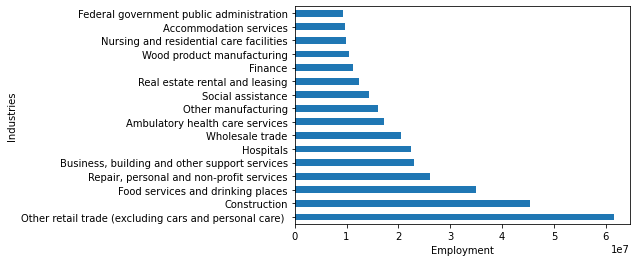

In [ ]:
data_output_grouped_lmo[:16].plot(kind='barh')
plt.xlabel('Employment')
plt.ylabel('Industries')


<h2> Q2. What happened to the employment in Construction evolved over time compared to employment in other industries?

In [ ]:
construction=data_output_merged.loc[data_output_merged['LMO_Detailed_Industry']=='Construction']
construction.head()

,LMO_Detailed_Industry,NAICS,SYEAR,SMTH,Employment
2112,Construction,['23'],1997,1,118000.0
2113,Construction,['23'],1997,2,120000.0
2114,Construction,['23'],1997,3,116750.0
2115,Construction,['23'],1997,4,125500.0
2116,Construction,['23'],1997,5,123750.0


In [ ]:
construction_by_year=construction.groupby(['SYEAR'])['Employment'].sum()
construction_by_year

SYEAR
1997    1489750.0
1998    1424750.0
1999    1363500.0
2000    1345750.0
2001    1347250.0
2002    1401500.0
2003    1412000.0
2004    1705000.0
2005    1989000.0
2006    2097000.0
2007    2301000.0
2008    2616750.0
2009    2444750.0
2010    2380750.0
2011    2365750.0
2012    2383250.0
2013    2453000.0
2014    2406500.0
2015    2417750.0
2016    2536000.0
2017    2743250.0
2018    2860750.0
Name: Employment, dtype: float64

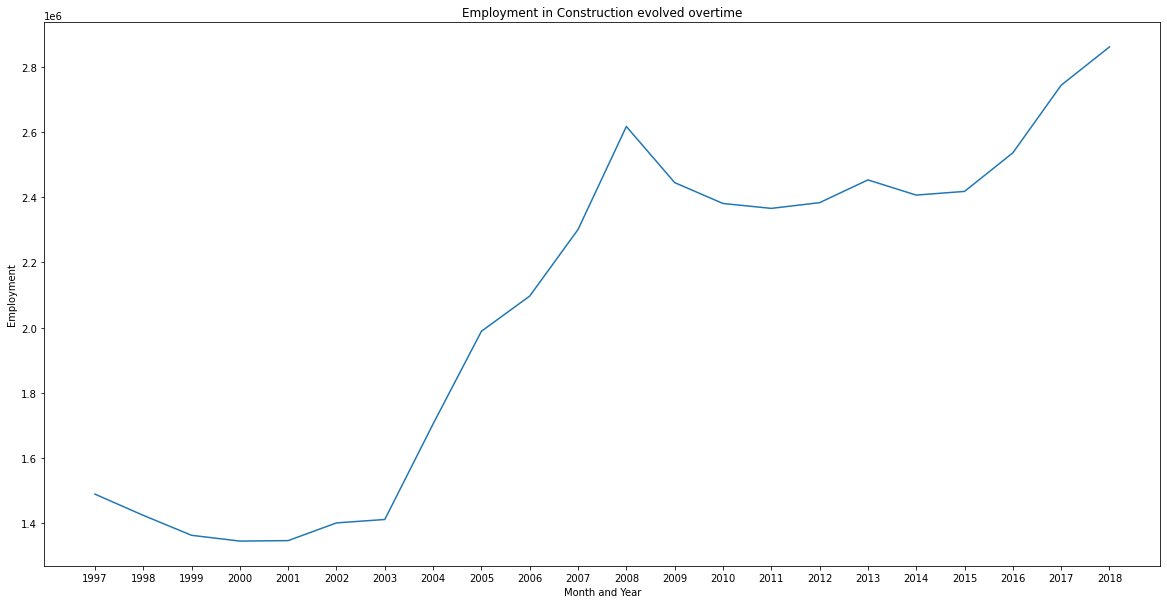

In [ ]:
from IPython.core.pylabtools import figsize


plt.plot(construction_by_year.index,construction_by_year.values)
plt.xticks(range(1997,2019))
plt.title("Employment in Construction evolved overtime")
plt.xlabel("Month and Year")
plt.ylabel("Employment")
plt.show(figsize(10,10))

<h2> Q3. How has employment in Construction evolved over time compared to employment in other industries?

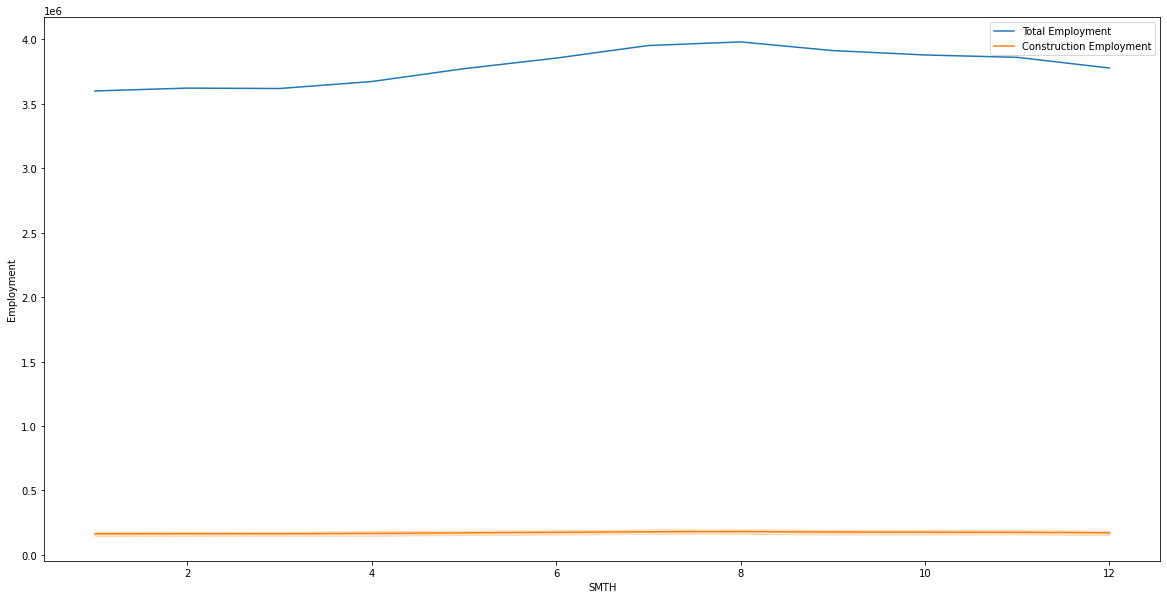

In [ ]:
total_employment=construction.groupby("SMTH")["Employment"].sum()
total_employment = total_employment.reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(x="SMTH", y="Employment", data=total_employment, label="Total Employment")
sns.lineplot(x="SMTH", y="Employment", data=construction, label="Construction Employment")
plt.show()

<h2> Q4. How the employment changed every year?

In [ ]:
index = data_output_merged.groupby('SYEAR')['Employment'].idxmax()
print(data_output_merged.loc[index].head())

                                  LMO_Detailed_Industry  \
5550  Other retail trade (excluding cars and persona...   
5567  Other retail trade (excluding cars and persona...   
5570  Other retail trade (excluding cars and persona...   
5586  Other retail trade (excluding cars and persona...   
5602  Other retail trade (excluding cars and persona...   

                                                  NAICS  SYEAR  SMTH  \
5550  ['442,443,444,445,446,447,448,451,452,453', '4...   1997     7   
5567  ['442,443,444,445,446,447,448,451,452,453', '4...   1998    12   
5570  ['442,443,444,445,446,447,448,451,452,453', '4...   1999     3   
5586  ['442,443,444,445,446,447,448,451,452,453', '4...   2000     7   
5602  ['442,443,444,445,446,447,448,451,452,453', '4...   2001    11   

      Employment  
5550    211000.0  
5567    219750.0  
5570    218250.0  
5586    219500.0  
5602    219250.0  


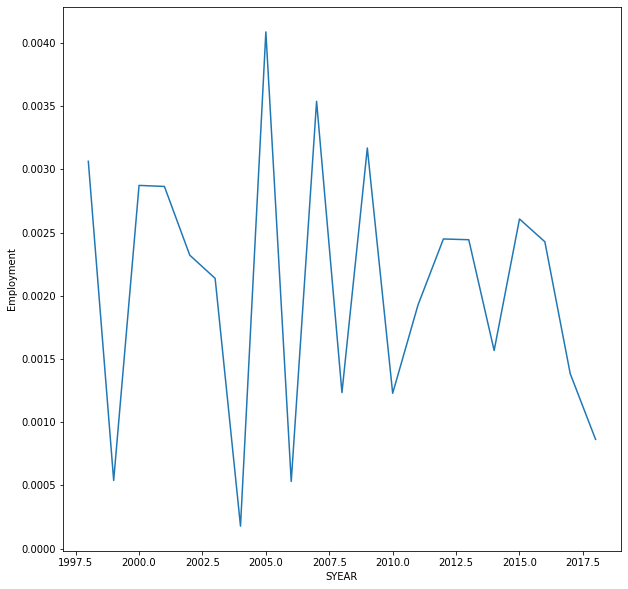

In [ ]:
sns.lineplot(data=index.pct_change())

<h2> Q5. What's the average of employment for each industry over time?

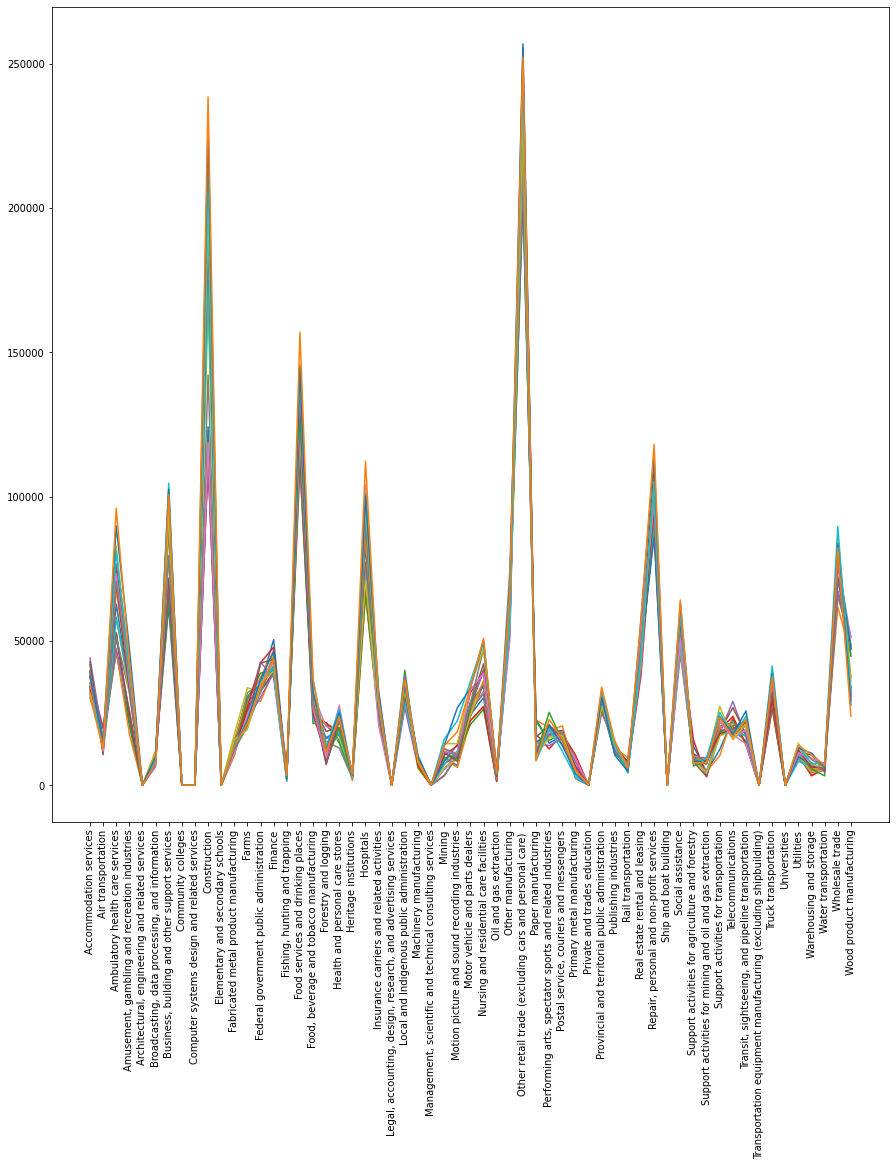

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.plot(pd.crosstab(data_output_merged['LMO_Detailed_Industry'], [data_output_merged['SYEAR']], values = data_output_merged['Employment'], aggfunc='mean'))

plt.xticks(rotation='vertical')

plt.show()